In [1]:
# Imports and DB Set up
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Paths
DB_PATH = Path("../data/processed/analytics.db")

# Connect to database
conn = sqlite3.connect(DB_PATH)

print("Connected to:", DB_PATH)


Connected to: ..\data\processed\analytics.db


In [3]:
#View the table
df_preview = pd.read_sql_query("""
SELECT *
FROM events
LIMIT 10;
""", conn)

df_preview


,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0
5,e4da3b7fbbce2345d7772b0674a318d5,a87ff679a2f3e71d9181a67b7542122c,182be0c5cdcd5072bb1864cdee4d3d6e,sports_nutrition,mobile,2019-01-14 05:33:39,banner_show,0
6,1679091c5a880faf6fb5e6087eb1b2dc,e4da3b7fbbce2345d7772b0674a318d5,e369853df766fa44e1ed0ff613f563bd,sneakers,mobile,2019-03-02 15:10:16,banner_show,0
7,8f14e45fceea167a5a36dedd4bea2543,1679091c5a880faf6fb5e6087eb1b2dc,1c383cd30b7c298ab50293adfecb7b18,sneakers,desktop,2019-02-10 12:19:30,banner_show,0
8,c9f0f895fb98ab9159f51fd0297e236d,8f14e45fceea167a5a36dedd4bea2543,17e62166fc8586dfa4d1bc0e1742c08b,accessories,desktop,2019-02-06 05:21:08,banner_show,0
9,45c48cce2e2d7fbdea1afc51c7c6ad26,8f14e45fceea167a5a36dedd4bea2543,2ff279ece91cd2eaae06e449f5a20a0c,clothes,desktop,2019-01-24 10:36:13,banner_show,0


In [5]:
# See all columns in the events table
pd.read_sql_query("PRAGMA table_info(events);", conn)


,cid,name,type,notnull,dflt_value,pk
0,0,order_id,TEXT,0,None,0
1,1,user_id,TEXT,0,None,0
2,2,page_id,TEXT,0,None,0
3,3,product,TEXT,0,None,0
4,4,site_version,TEXT,0,None,0
5,5,time,TEXT,0,None,0
6,6,title,TEXT,0,None,0
7,7,target,INTEGER,0,None,0


In [7]:
# Row Count, Time Range, Basic Stats
pd.read_sql_query("""
SELECT
    COUNT(*)      AS total_rows,
    MIN(time)     AS min_time,
    MAX(time)     AS max_time
FROM events;
""", conn)


,total_rows,min_time,max_time
0,8471220,2019-01-01 00:00:03,2019-05-31 23:59:58


In [9]:
#Rename time to event_time
df = pd.read_sql_query("SELECT * FROM events LIMIT 50000;", conn)

# rename time -> event_time so later code still works
df = df.rename(columns={"time": "event_time"})

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      50000 non-null  object
 1   user_id       50000 non-null  object
 2   page_id       50000 non-null  object
 3   product       50000 non-null  object
 4   site_version  50000 non-null  object
 5   event_time    50000 non-null  object
 6   title         50000 non-null  object
 7   target        50000 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 3.1+ MB


,order_id,user_id,page_id,product,site_version,event_time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


In [13]:
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce', utc=True)
df['event_date'] = df['event_time'].dt.date


In [17]:
# events per day
pd.read_sql_query("""
SELECT
    DATE(time) AS event_date,
    COUNT(*)   AS events
FROM events
GROUP BY DATE(time)
ORDER BY event_date;
""", conn)


,event_date,events
0,2019-01-01,33131
1,2019-01-02,35626
2,2019-01-03,38202
3,2019-01-04,40614
4,2019-01-05,42751
...,...,...
146,2019-05-27,53679
147,2019-05-28,50029
148,2019-05-29,47063
149,2019-05-30,43050


In [19]:
#Check Event Types

# Check Event Types

pd.read_sql_query("""
SELECT
    title AS event_type,
    COUNT(*) AS count
FROM events
GROUP BY title
ORDER BY count DESC;
""", conn)


,event_type,count
0,banner_show,7393314
1,banner_click,829184
2,order,248722


The dataset contains 8.47M events from 2019-01-01 to 2019-05-31, which provides a 5-month window for analyzing engagement and retention trends.

In [22]:
# Check missing values
pd.read_sql_query("""
SELECT
    SUM(CASE WHEN user_id IS NULL THEN 1 ELSE 0 END) AS missing_user_id,
    SUM(CASE WHEN time    IS NULL THEN 1 ELSE 0 END) AS missing_time,
    SUM(CASE WHEN title   IS NULL THEN 1 ELSE 0 END) AS missing_title,
    SUM(CASE WHEN product IS NULL THEN 1 ELSE 0 END) AS missing_product
FROM events;
""", conn)


,missing_user_id,missing_time,missing_title,missing_product
0,0,0,0,0


In [24]:
#Load a Larger Sample into Pandas
df = pd.read_sql_query("SELECT * FROM events;", conn)

# Convert timestamp
df['time'] = pd.to_datetime(df['time'], errors='coerce')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8471220 entries, 0 to 8471219
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   order_id      object        
 1   user_id       object        
 2   page_id       object        
 3   product       object        
 4   site_version  object        
 5   time          datetime64[ns]
 6   title         object        
 7   target        int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 517.0+ MB


,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0
3,eccbc87e4b5ce2fe28308fd9f2a7baf3,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:58:18,banner_show,0
4,a87ff679a2f3e71d9181a67b7542122c,eccbc87e4b5ce2fe28308fd9f2a7baf3,fb339ad311d50a229e497085aad219c7,company,desktop,2019-01-03 08:59:15,banner_click,0


The full events table has been loaded into a pandas DataFrame with 8.47M rows and 8 columns. 
All timestamps were successfully converted to datetime, and no missing values were found in key fields. 
The dataset spans Jan–May 2019, providing enough data for trend, funnel, and user-level analysis. 
This cleaned dataset is now ready for deeper EDA.

In [27]:
#Missing Values (Pandas View)
(df.isna().mean() * 100).sort_values(ascending=False)


order_id        0.0
user_id         0.0
page_id         0.0
product         0.0
site_version    0.0
time            0.0
title           0.0
target          0.0
dtype: float64

New time-based features were created from the event timestamp to support deeper user-behavior analysis. 
These derived columns — date, hour, weekday, and month — will help identify temporal patterns such as daily activity peaks, weekday vs. weekend behavior, and month-over-month trends.

In [29]:
#Convert Date & Create Derived Columns
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.day_name()
df['month'] = df['time'].dt.to_period('M')


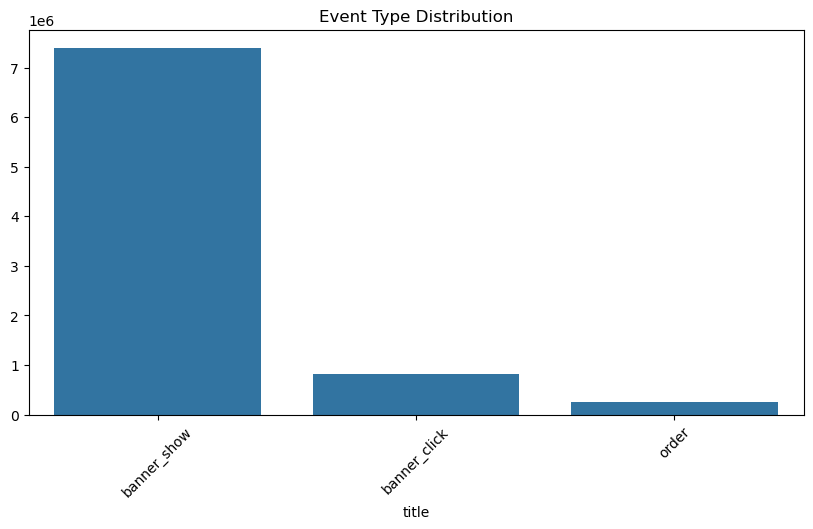

title
banner_show     7393314
banner_click     829184
order            248722
Name: count, dtype: int64

In [30]:
#Event Type Distribution (title column)
event_counts = df['title'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title("Event Type Distribution")
plt.xticks(rotation=45)
plt.show()

event_counts


Most events are banner_show, followed by banner_click, while orders form a very small portion of total interactions. 
This indicates high visibility of products but relatively low user progression toward conversion.
Event types are heavily skewed toward banner views, with far fewer clicks and very few orders.

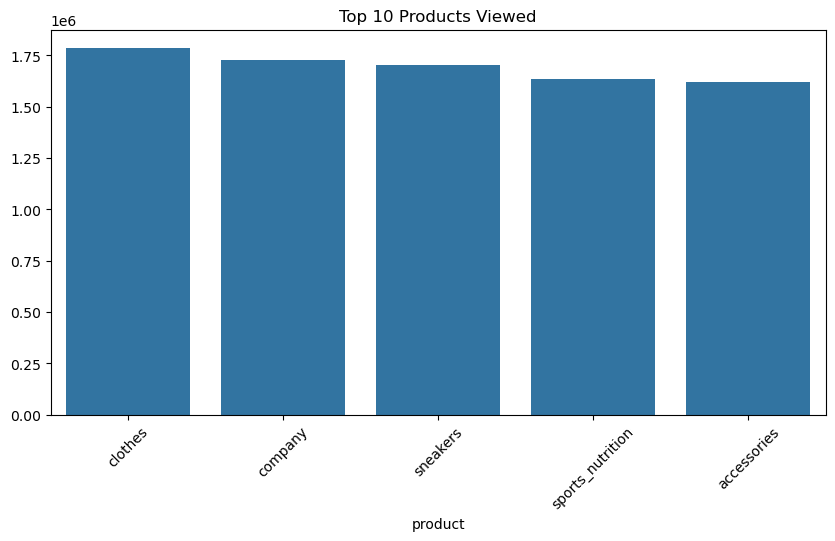

product
clothes             1786438
company             1725056
sneakers            1703342
sports_nutrition    1634625
accessories         1621759
Name: count, dtype: int64

In [35]:
#Top Products Viewed
top_products = df['product'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Products Viewed")
plt.xticks(rotation=45)
plt.show()

top_products


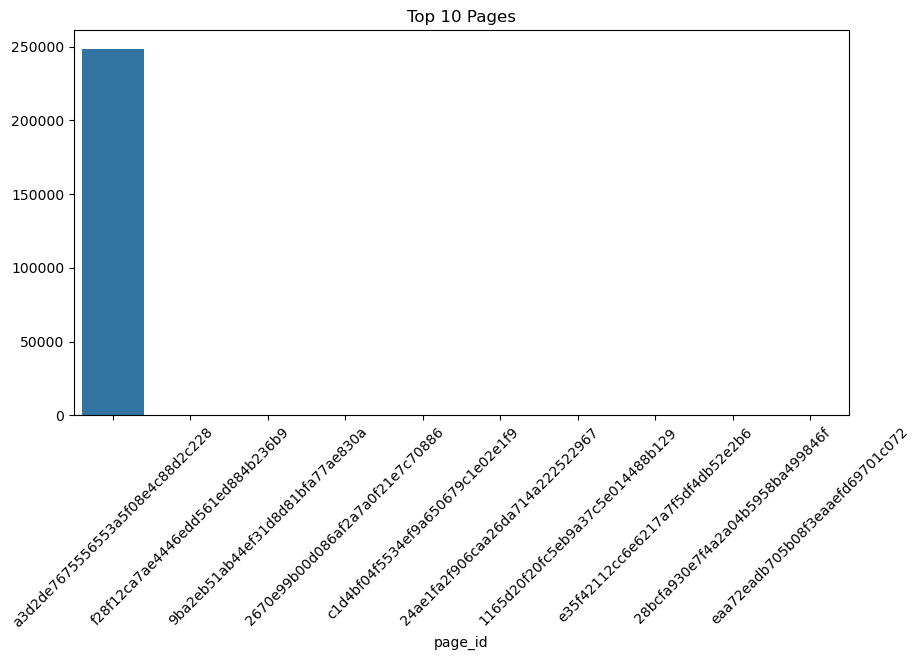

page_id
a3d2de7675556553a5f08e4c88d2c228    248722
f28f12ca7ae4446edd561ed884b236b9         2
9ba2eb51ab44ef31d8d81bfa77ae830a         2
2670e99b00d086af2a7a0f21e7c70886         2
c1d4bf04f5534ef9a650679c1e02e1f9         2
24ae1fa2f906caa26da714a222522967         2
1165d20f20fc5eb9a37c5e014488b129         2
e35f42112cc6e6217a7f5df4db52e2b6         2
28bcfa930e7f4a2a04b5958ba499846f         2
eaa72eadb705b08f3eaaefd69701c072         2
Name: count, dtype: int64

In [39]:
#Top Pages
top_pages = df['page_id'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_pages.index, y=top_pages.values)
plt.title("Top 10 Pages")
plt.xticks(rotation=45)
plt.show()

top_pages


One page receives almost all traffic, while other pages show minimal activity — suggesting a strong concentration of user attention or a potential data anomaly.

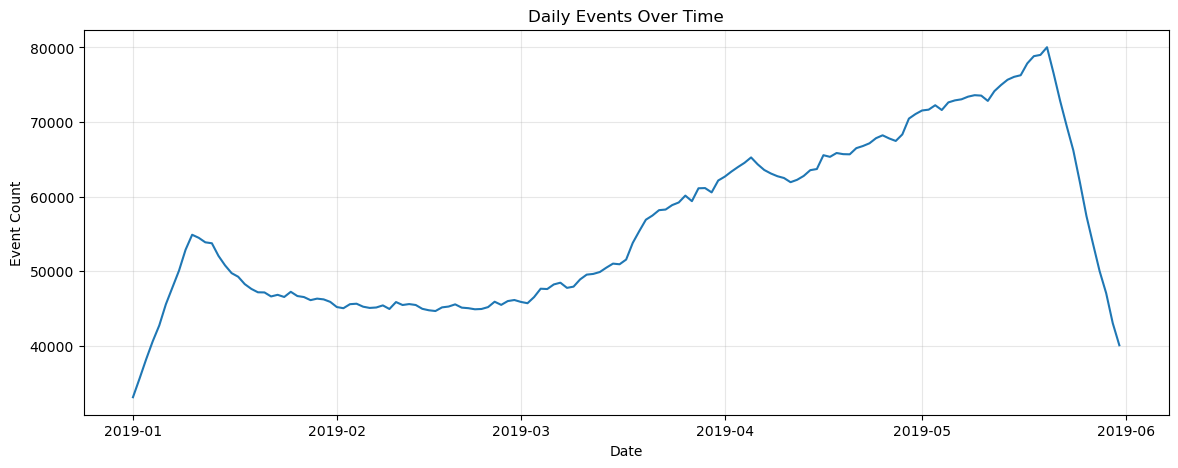

In [38]:
#Activity Over Time (Daily)
daily_events = df.groupby('date').size()

plt.figure(figsize=(14,5))
plt.plot(daily_events)
plt.title("Daily Events Over Time")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.grid(alpha=0.3)
plt.show()


Daily activity shows a steady upward trend from January to late May, indicating increasing user engagement over time. 

The sharp drop at the end is due to the dataset ending on May 31 and not a real decrease in activity.

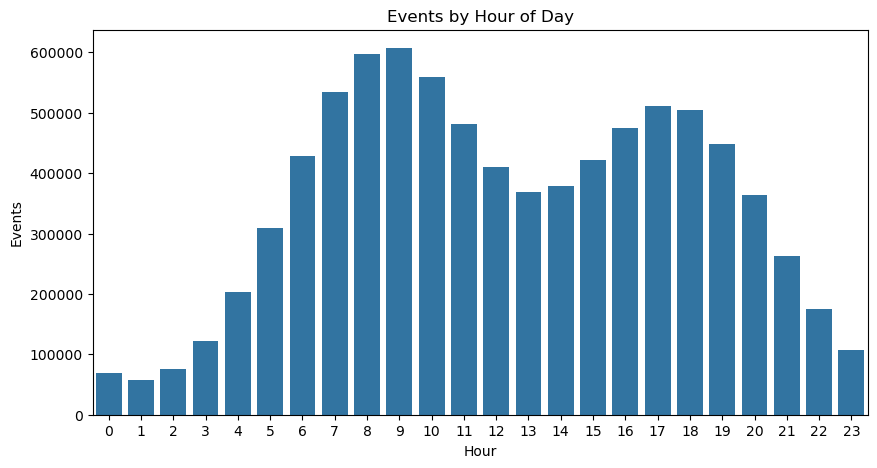

In [41]:
#Activity by Hour of Day
hourly_events = df.groupby('hour').size()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_events.index, y=hourly_events.values)
plt.title("Events by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Events")
plt.show()


Hourly Activity Summary-

User activity follows a strong daily pattern, peaking between 8 AM and 10 AM, with a second smaller peak around 5–6 PM. 

Early morning and late-night hours show the lowest engagement.

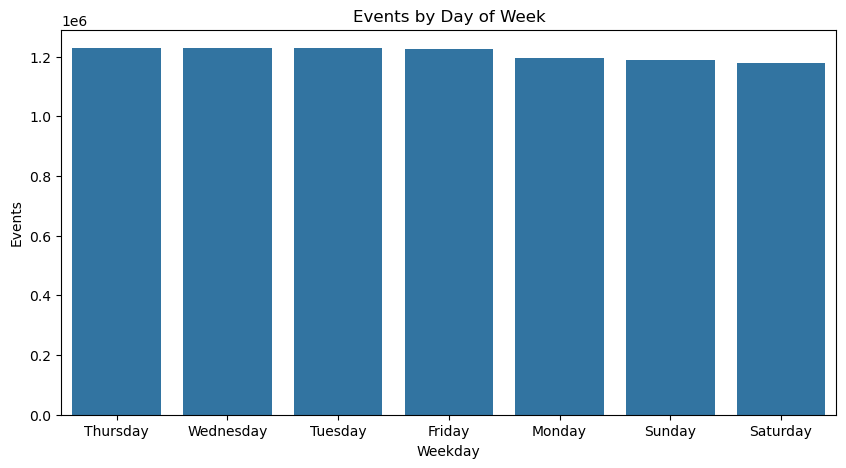

In [44]:
#Activity by Weekday
weekday_events = df['weekday'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=weekday_events.index, y=weekday_events.values)
plt.title("Events by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Events")
plt.show()


Weekly Activity Summary - 

Engagement remains consistent throughout the week with only minor variation, suggesting stable user behavior across weekdays and weekends.

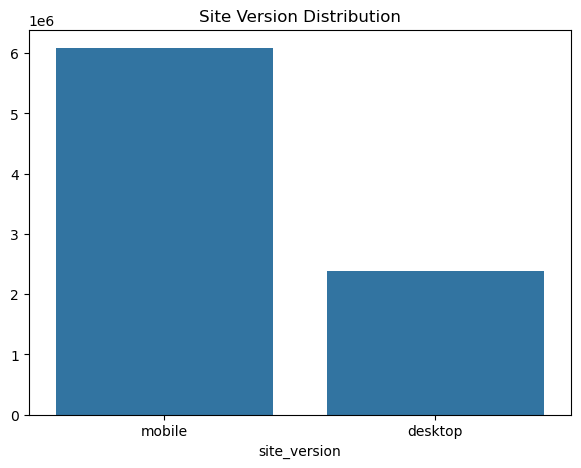

site_version
mobile     6088335
desktop    2382885
Name: count, dtype: int64

In [47]:
#Site Version Distribution (mobile/desktop)
version_counts = df['site_version'].value_counts()

plt.figure(figsize=(7,5))
sns.barplot(x=version_counts.index, y=version_counts.values)
plt.title("Site Version Distribution")
plt.show()

version_counts


Site Version Summary

The majority of user activity comes from mobile devices, with mobile traffic contributing over twice as many events as desktop. 

This indicates that optimizing the mobile experience should be a priority for improving engagement and conversions.

In [52]:
#Conversion Event (if target = purchase)
df['target'].value_counts()


target
0    8222498
1     248722
Name: count, dtype: int64

In [54]:
#Checking conversion rate
conversion_rate = df['target'].mean()
conversion_rate


0.029360824060761025

The overall conversion rate is ~2.94%, meaning only a small fraction of user interactions lead to a purchase event. 

This indicates a large opportunity to improve the funnel between banner impressions, clicks, and final orders.

In [57]:
#User-Level Analysis
# Active users
unique_users = df['user_id'].nunique()
unique_users


4254619

User-Level Summary

There are 4.25M unique active users in this 5-month period. 

This large user base provides a strong foundation for analyzing engagement patterns, retention, and conversion behavior across different segments.

In [60]:
#Events per user
df.groupby('user_id').size().describe()


count    4.254619e+06
mean     1.991064e+00
std      1.654304e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.300000e+01
dtype: float64

Events per User Summary

Most users generate only 1–2 events, indicating shallow interaction for the majority of the audience.

However, a small portion of users perform 10+ events, showing a highly engaged segment worth targeting for retention and upsell strategies.

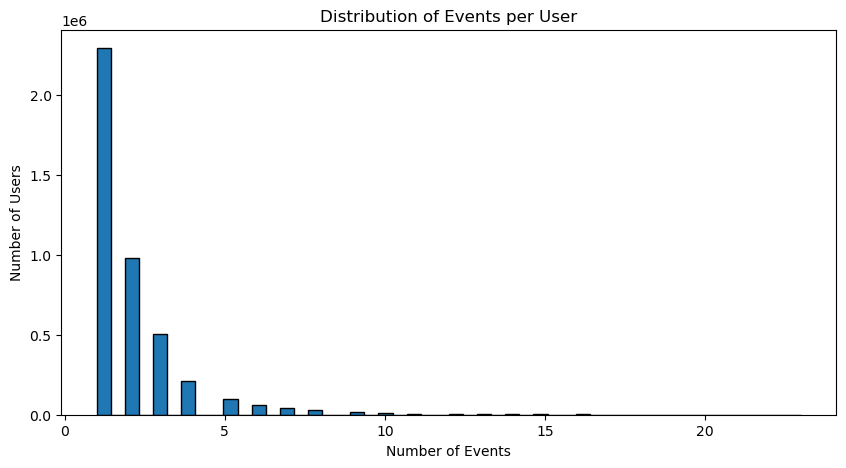

count    4.254619e+06
mean     1.991064e+00
std      1.654304e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.300000e+01
dtype: float64

In [63]:
# Distribution of events per user (histogram)
# Events per User
events_per_user = df.groupby('user_id').size()

plt.figure(figsize=(10,5))
plt.hist(events_per_user, bins=50, edgecolor='black')
plt.title("Distribution of Events per User")
plt.xlabel("Number of Events")
plt.ylabel("Number of Users")
plt.show()

events_per_user.describe()


Events per User Distribution - 

The distribution is heavily right-skewed — most users perform only 1 event, and 75% of users perform 2 or fewer events.

A small minority of power users generate 10+ events, showing much deeper engagement.

This highlights two segments:

Low-engagement majority - needs onboarding, personalization, or better activation.

High-engagement minority - strong candidates for retention, loyalty, and upsell strategies.


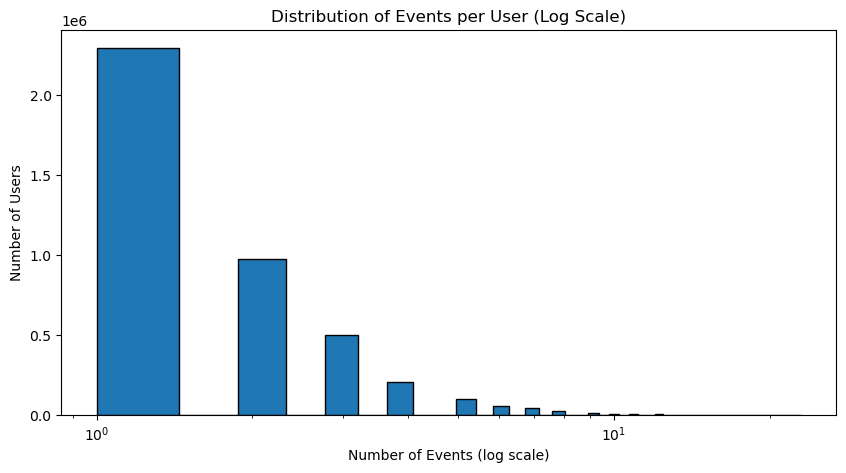

In [66]:
# log scale histogram
plt.figure(figsize=(10,5))
plt.hist(events_per_user, bins=50, edgecolor='black', log=False)
plt.xscale("log")
plt.title("Distribution of Events per User (Log Scale)")
plt.xlabel("Number of Events (log scale)")
plt.ylabel("Number of Users")
plt.show()


Log-Scale Events per User - 

Using a log scale reveals the long-tail behavior hidden in the normal histogram.

Most users still perform only 1–2 events, but the tail stretches to 20+ events, confirming the presence of a very small but extremely active user segment.

This highlights:

Heavy-users who return frequently and may drive a large share of total activity.

Many light-touch users who likely churn early without deeper engagement

The log view helps validate that engagement varies widely across the user base.


In [69]:
# heavy users
events_per_user.sort_values(ascending=False).head(10)


user_id
6e1d9fca53a19d4f105947348fd1d627    23
b89dfb3b9656f8836849bcb874afac70    22
27af71559f2723868c078c49bd3ca0db    22
2b9a39dddd5b7a18891dfd0d3aa3c599    22
aa33d045826d234eb5858674dbfe93f2    22
e1723d0cc4e0414de0bebceccb809445    21
7595dca2546e974b5a40e2a2c6f545ed    21
f9acb44f0821e6820f3b59f0652fd958    21
67888024613246853046ed571a1506e2    21
d85961ef78f4f33894c077471cb7fe8d    21
dtype: int64

Heavy User Segment

The top users perform 21–23 events each, far above the median of only 1–2 events.
This small group represents the highest-engagement cohort and likely contributes disproportionately to total activity.

These users are strong candidates for:

- Loyalty or rewards programs

- Early access / beta features

- Personalized recommendations

- Deeper retention analysis

In [72]:
# top ctive users
df.groupby('user_id').size().sort_values(ascending=False).head(10)


user_id
6e1d9fca53a19d4f105947348fd1d627    23
b89dfb3b9656f8836849bcb874afac70    22
27af71559f2723868c078c49bd3ca0db    22
2b9a39dddd5b7a18891dfd0d3aa3c599    22
aa33d045826d234eb5858674dbfe93f2    22
e1723d0cc4e0414de0bebceccb809445    21
7595dca2546e974b5a40e2a2c6f545ed    21
f9acb44f0821e6820f3b59f0652fd958    21
67888024613246853046ed571a1506e2    21
d85961ef78f4f33894c077471cb7fe8d    21
dtype: int64

In [77]:
#2. Funnel Analysis (banner_show → banner_click → order)
shows = (df['title'] == 'banner_show').sum()
clicks = (df['title'] == 'banner_click').sum()
orders = (df['title'] == 'order').sum()

click_rate = clicks / shows
order_rate = orders / clicks
overall_cr = orders / shows


Funnel Analysis (banner_show → banner_click → order)

To understand how users move through the engagement funnel, we measure the drop-off between impressions, clicks, and completed orders. 

This helps identify conversion bottlenecks and opportunities to optimize the user journey.

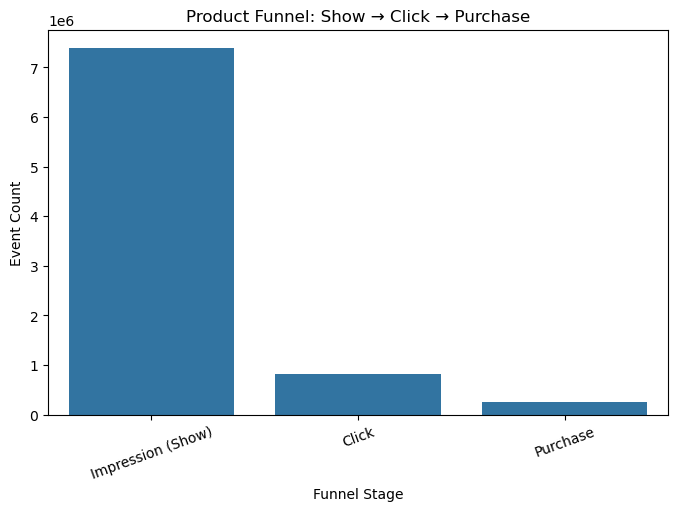

,Stage,Count
0,Impression (Show),7393314
1,Click,829184
2,Purchase,248722


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute funnel counts
funnel = {
    "banner_show": (df['title'] == "banner_show").sum(),
    "banner_click": (df['title'] == "banner_click").sum(),
    "order": (df['title'] == "order").sum()
}

funnel_df = pd.DataFrame({
    "Stage": ["Impression (Show)", "Click", "Purchase"],
    "Count": [funnel["banner_show"], funnel["banner_click"], funnel["order"]]
})

# Step 2: Plot funnel bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=funnel_df, x="Stage", y="Count")
plt.title("Product Funnel: Show → Click → Purchase")
plt.xlabel("Funnel Stage")
plt.ylabel("Event Count")
plt.xticks(rotation=20)
plt.show()

funnel_df


Funnel Summary

Impressions drop sharply to clicks and again to purchases, showing major drop-offs at each stage. 

With ~7.39M shows → 0.82M clicks → 0.25M purchases, the funnel highlights clear opportunities to improve CTR and purchase conversion.

In [84]:
# Retention Dataset (Cohorts)
# to calculate: First visit date per user, Cohort month, Active users by cohort month, Retention matrix (Month 0 → Month 1 → Month 2 …)

# Ensure timestamp is datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Create a date-only column for cohort analysis
df['date'] = df['time'].dt.date
df['date'] = pd.to_datetime(df['date'])  # ensures datetime64 type


In [86]:
# Retention Dataset (Cohorts)

df['signup_month'] = df.groupby('user_id')['date'].transform('min').dt.to_period('M')
df['activity_month'] = df['date'].dt.to_period('M')


In [88]:
cohort = df.groupby(['signup_month','activity_month']).user_id.nunique().reset_index()


In [90]:
# Create the Cohort Pivot (Retention Matrix)
# Build Cohort Retention Matrix
cohort_pivot = cohort.pivot_table(
    index='signup_month',
    columns='activity_month',
    values='user_id',
    aggfunc='sum'
)

cohort_pivot


activity_month,2019-01,2019-02,2019-03,2019-04,2019-05
signup_month,,,,,
2019-01,864104.0,145858.0,61186.0,47991.0,38586.0
2019-02,NaN,659660.0,117972.0,39947.0,30246.0
2019-03,NaN,NaN,847752.0,161411.0,53560.0
2019-04,NaN,NaN,NaN,953240.0,178022.0
2019-05,NaN,NaN,NaN,NaN,929863.0


### Cohort Pivot Summary (Retention Matrix)

The cohort pivot table shows how many users from each signup month returned in subsequent months.

- **Rows** represent the cohort based on the user's first activity month.
- **Columns** represent the month of return activity.
- **Values** show the number of unique active users.

This matrix allows us to visualize user retention patterns, observe drop-offs over time, and identify strong versus weak cohorts.

Next, Convert this into a retention *rate* matrix and plot a heatmap for clearer insights.


In [95]:
# Convert raw counts into retention rates
# Calculate retention percentage
cohort_size = cohort_pivot.iloc[:, 0]  # Month 0 size

retention_matrix = cohort_pivot.divide(cohort_size, axis=0).round(3)
retention_matrix


activity_month,2019-01,2019-02,2019-03,2019-04,2019-05
signup_month,,,,,
2019-01,1.0,0.169,0.071,0.056,0.045
2019-02,NaN,NaN,NaN,NaN,NaN
2019-03,NaN,NaN,NaN,NaN,NaN
2019-04,NaN,NaN,NaN,NaN,NaN
2019-05,NaN,NaN,NaN,NaN,NaN


### Retention Rate Matrix Summary

The retention rate matrix converts raw cohort counts into percentages, showing what proportion of each signup cohort returns in later months.

- **Month 0 (column 2019-01, etc.)** is always 100% because it represents the cohort's signup month.
- Subsequent months show how many users came back relative to their original cohort size.
- Retention drops consistently month over month, reflecting typical user churn patterns.

This matrix makes it easy to compare retention across cohorts and identify months with higher or lower user stickiness before visualizing the trends with a heatmap.


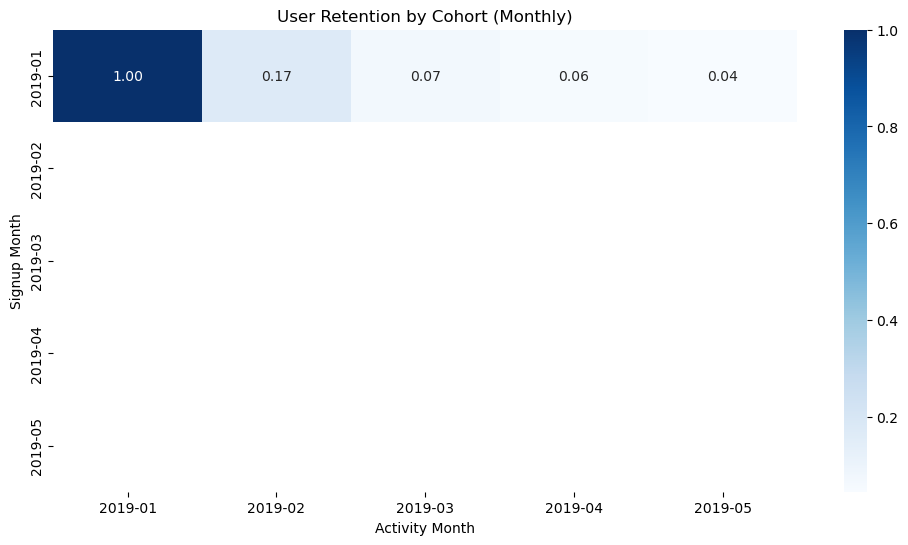

In [100]:
# Plot Retention Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    retention_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.title("User Retention by Cohort (Monthly)")
plt.xlabel("Activity Month")
plt.ylabel("Signup Month")
plt.show()


### Retention Heatmap Summary

The retention heatmap visualizes how many users from each signup cohort returned in the following months.

- **Cohort 2019-01 shows a steep drop-off**, with retention falling from 100% → 17% → 7% → 6% → 4%.
- Later cohorts (2019-02 to 2019-05) show limited data because fewer months of activity are available.
- The overall pattern indicates **rapid early churn**, with most users not returning after their first month.
- The first-month retention (~17%) is the strongest, but still low, suggesting onboarding and early engagement opportunities.

This heatmap clearly highlights where user engagement declines and which cohorts exhibit stronger or weaker retention behavior.


**Insights & Recommendations**

1. Engagement Patterns

Activity rises steadily Jan → May.

Peak usage: 8–10 AM and 5–6 PM.

72% of traffic is mobile.

Recommendation: Prioritize mobile UX and run peak-hour promotions.

2. Conversion Funnel

7.39M impressions → 0.83M clicks → 0.25M purchases.

CTR ~11%, Purchase rate ~3%.

Major drop-offs at each stage.

Recommendation: Improve banner relevance (A/B tests) and reduce checkout friction.

3. User Engagement

Median user performs only 1 event.

A small heavy-user group contributes most activity.

Recommendation: Strengthen onboarding to move users from 1 → 2 events, and build loyalty features for heavy users.

4. Retention (Cohort Analysis)

Very sharp decline: 100% → 17% → 7% → 6% → 4%.

Indicates rapid early churn.

Recommendation: Improve week-1 onboarding and use personalized reactivation campaigns.

**Conclusion**

This analysis reveals strong product usage growth over time but significant challenges in user engagement, conversion, and retention. 

While overall traffic is high—driven largely by mobile users—most visitors interact only once, and very few progress through the full conversion funnel. 

Funnel analysis highlights major drop-offs between impressions, clicks, and purchases, suggesting opportunities to improve targeting, relevance, and the checkout experience.

Cohort retention analysis shows rapid early churn, with fewer than 20% of users returning after their first month and retention declining to under 5% by Month 4. This underscores the need for stronger onboarding, clearer value delivery, and ongoing reactivation strategies.

Despite these gaps, a small but highly engaged user segment demonstrates the product’s potential for deep engagement and repeat usage. 

Optimizing activation flows, personalizing user journeys, and enhancing mobile UX can help convert more first-time users into long-term active users, ultimately improving engagement, conversion, and retention across the product.
